In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Okay, so attaching package dplyr and ggplot2. DPLYR -----> a grammar of data manipulation, as quoted from Hadley Wickham. Dplyr has three main function, one of which is to identify the most important data manipulation verbs and make them easy to use from R. Command that can be found in dplyr: mutate (), select (), filter (), summarise () and arrange ().
ggplot2 ----> get into the world of programmatic data visualization. If DPLYR consists the library of a grammar of data manipulation, then ggplot2 will do the grammar of graphics. It has several function as follow:
aesthetics or data that will be plotted
geometris or the shape of the data (bar plot or scattered graphs, etc)
scales or transformation towards the data
facets or elements that may be graphed in the same dataset in the same space
layers or lay multiple geometris to reveal new information

In [2]:
enrollment <- read.csv("Data/collegeenrollment.csv")

import the data

In [3]:
head (enrollment)

College,Degree,MajorCode,MajorName,RaceGender,Race,Gender,Count,Total
College of Agri Sci and Natl Resources,B1BC,BIOC,Biochemistry,NonResidentAlienMale,NonResidentAlien,Male,3,97
College of Agri Sci and Natl Resources,B1AS,ASCI,Animal Science,NonResidentAlienMale,NonResidentAlien,Male,0,338
College of Agri Sci and Natl Resources,B1FW,FWL,Fisheries and Wildlife,NonResidentAlienMale,NonResidentAlien,Male,0,191
College of Agri Sci and Natl Resources,B1AP,APSC,Applied Science,NonResidentAlienMale,NonResidentAlien,Male,1,71
College of Agri Sci and Natl Resources,B1HO,HORT,Horticulture,NonResidentAlienMale,NonResidentAlien,Male,1,52
College of Agri Sci and Natl Resources,B1ED,AEDU,Agricultural Education,NonResidentAlienMale,NonResidentAlien,Male,0,103


call out the data and see the overal information in the dataset

**COJMC PERCENT CHANGE BY GENDER **

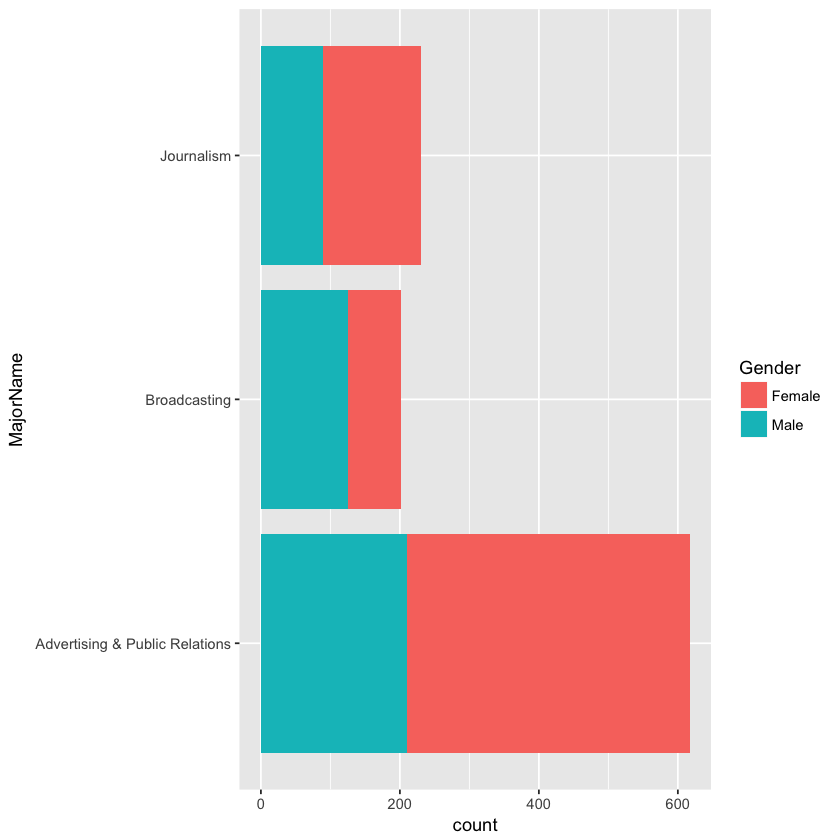

In [4]:
cojmc <- filter(enrollment, College == "College of Journalism & Mass Comm")
ggplot(cojmc, aes(MajorName, weight=Count, fill=Gender)) + geom_bar() + scale_color_brewer("Gender") + coord_flip()

Narrow the data and filter out. Choose the department of College of Journalism & Mass Comm. Use ggplot to call out the shape which is geom_bar (), add color brewer to the Gender, and add flip to avoid overlapping.  

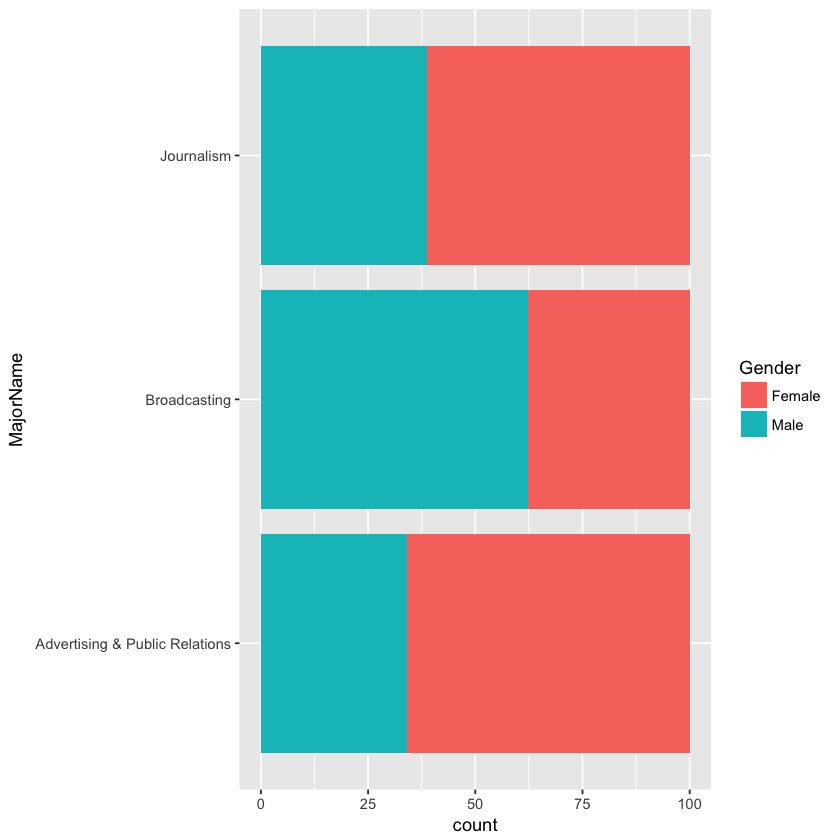

In [5]:
pctcojmc <- mutate(cojmc, Percent = (Count / Total)*100)
ggplot(pctcojmc, aes(MajorName, weight=Percent, fill=Gender)) + geom_bar() + coord_flip ()

Calculate the percent change for the Gender. and use ggplot again to call out the shape. 

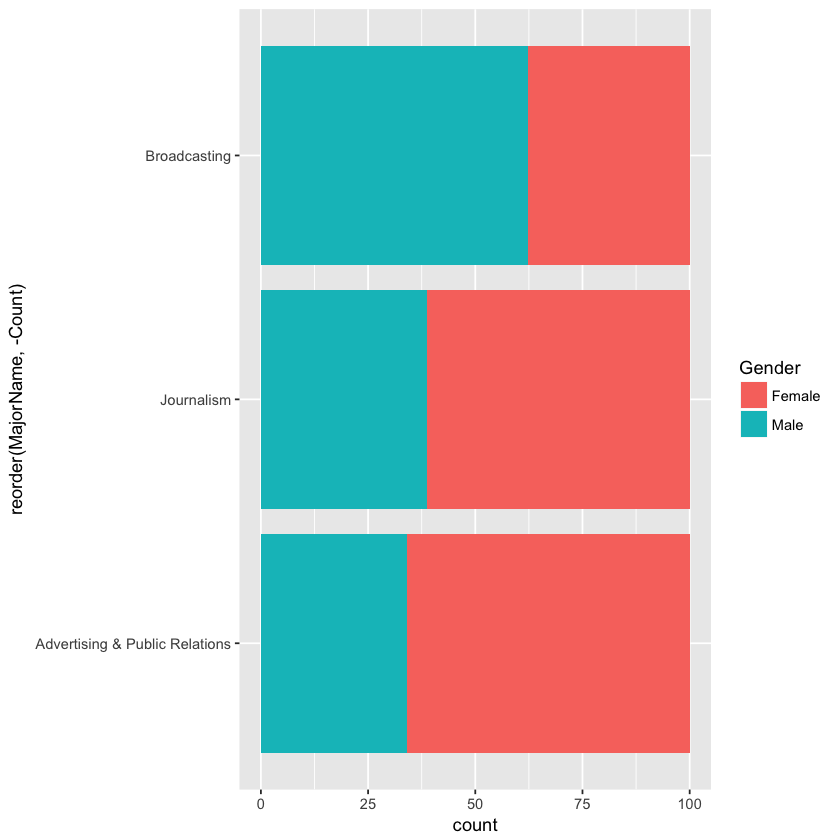

In [6]:
ggplot(pctcojmc, aes(reorder(MajorName, -Count), weight=Percent, fill=Gender)) + geom_bar() + coord_flip()

change the bar plot into in order of majors using reorder command. 

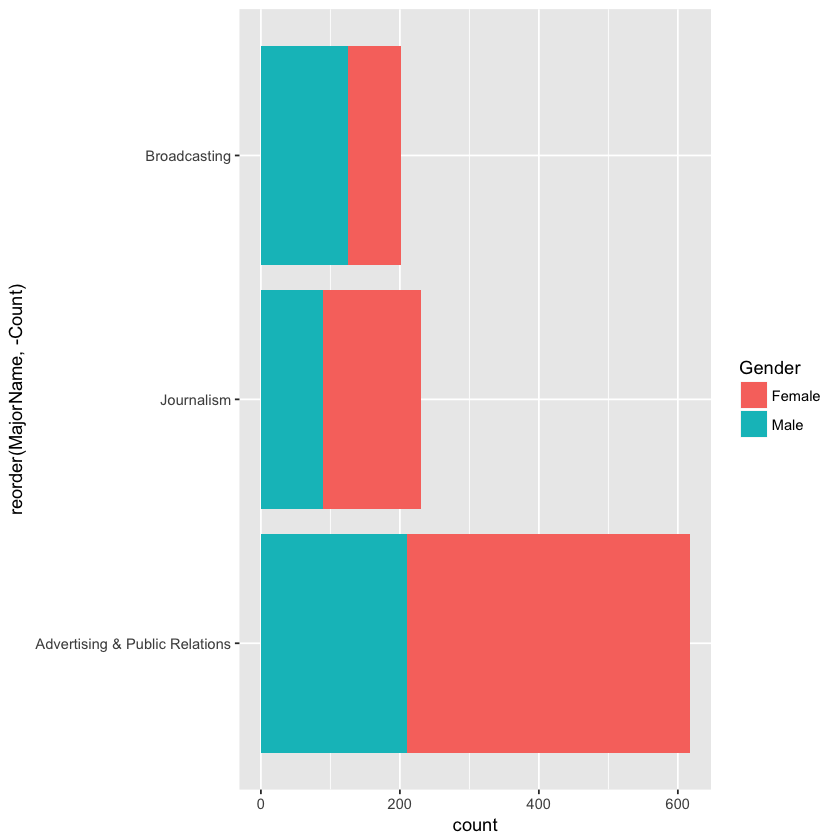

In [7]:
ggplot(cojmc, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip()

reorder again and use weight for count, not for percent change, so we can see the shape clearly.

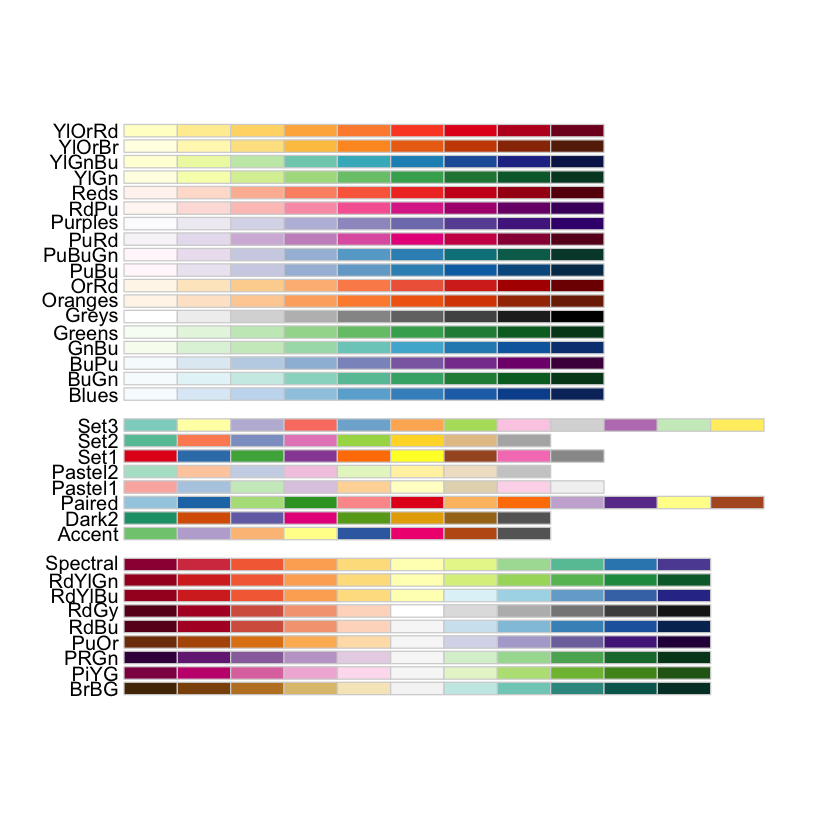

In [8]:
library("RColorBrewer")
display.brewer.all()

use colorbrewer as a library

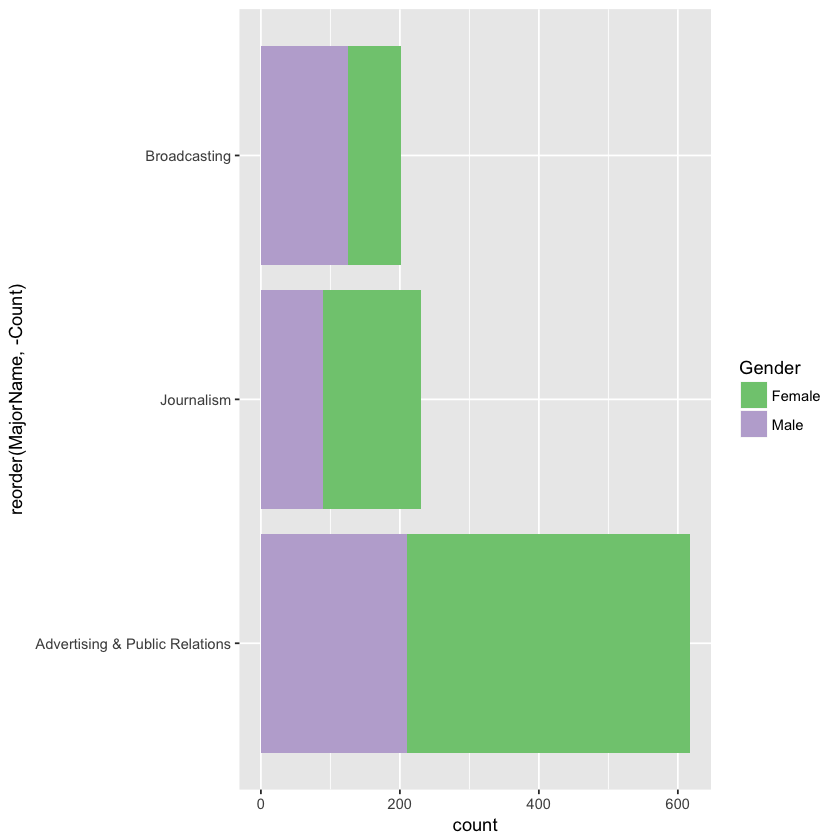

In [9]:
ggplot(cojmc, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip() + scale_fill_brewer(palette="Accent")

change the colours with accent pallete to differentiate female and male. this color is gender neutral, and not too bright to be seen.

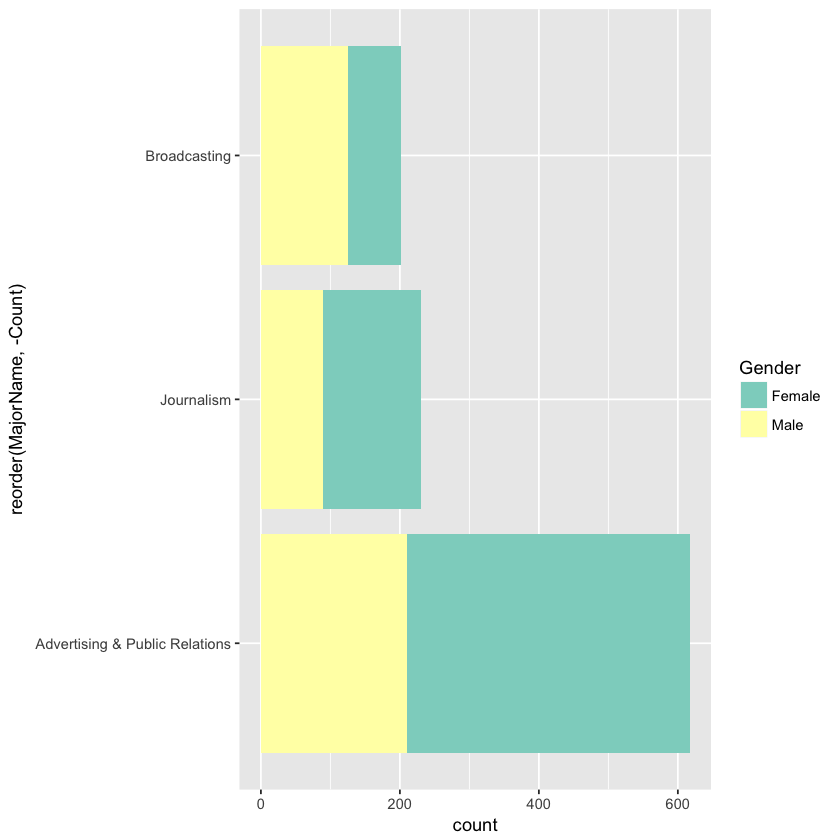

In [10]:
ggplot(cojmc, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip() + scale_fill_brewer(palette="Set3")

this color pallete Set3 is gender neutral, however... the yellow color is too bright and makes it is not too comfortable to be seen

**LARGEST MAJOR - PERCENTAGE - AND COLOR RAMPS**

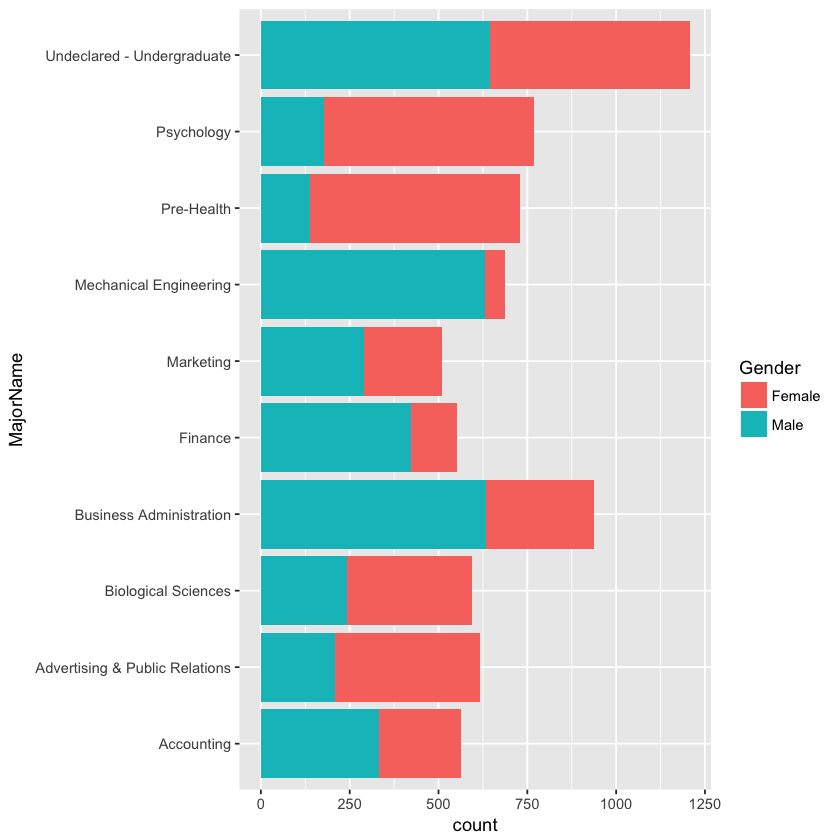

In [11]:
largest <- filter(enrollment, Total > 500)
ggplot(largest, aes(MajorName, weight=Count, fill=Gender)) + geom_bar() + coord_flip()

Filter top majors above 500, and call the shape by using ggplot, and fill the bar by Gender.

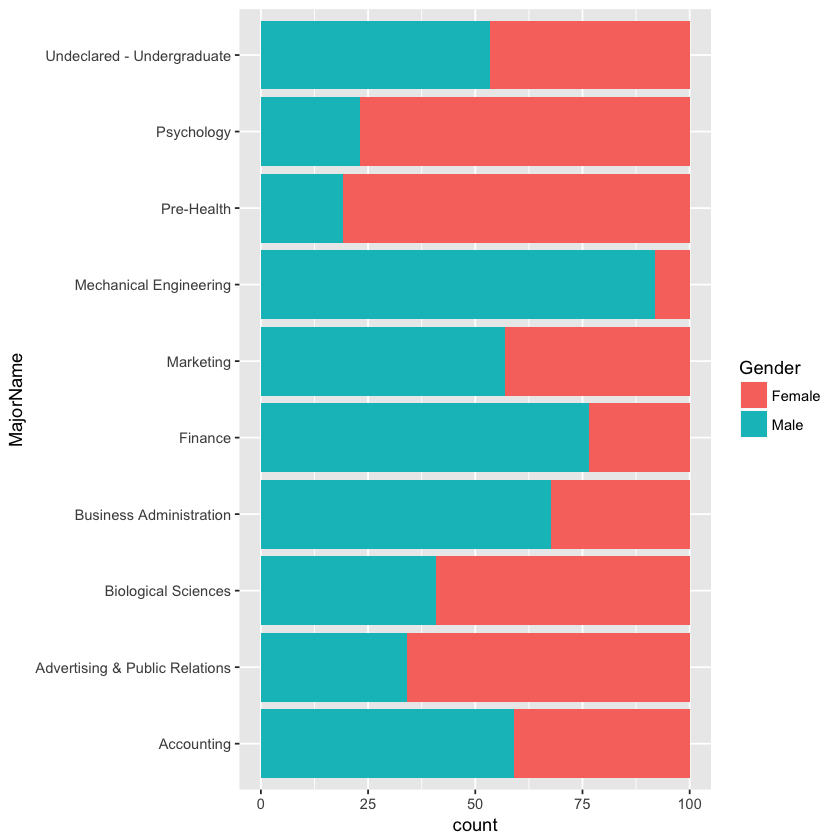

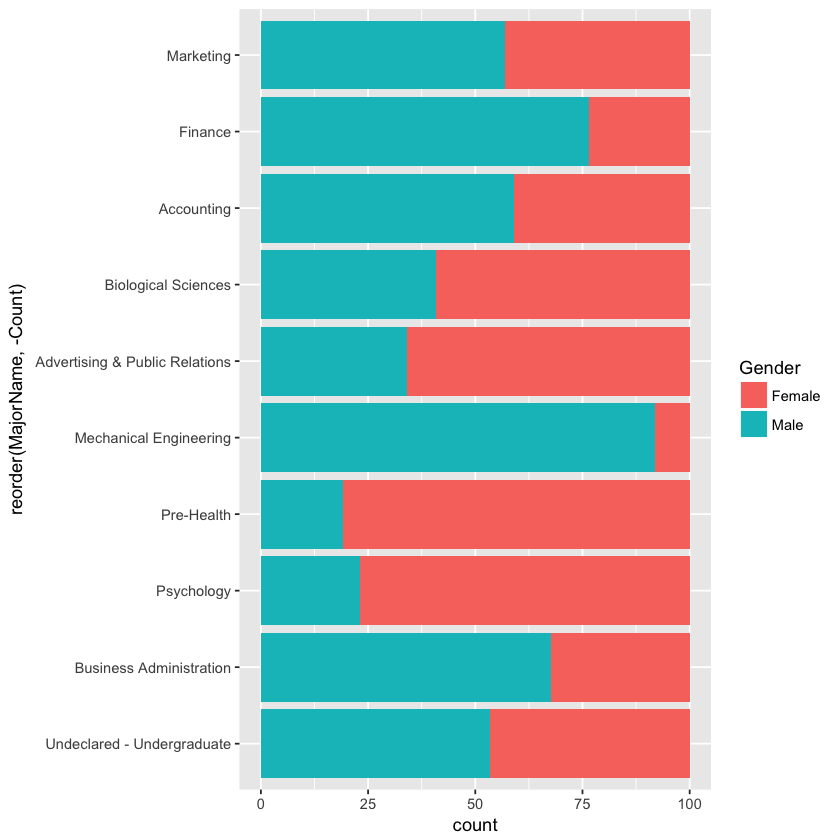

In [12]:
pctlargest <- mutate(largest, Percent = (Count / Total)*100)
ggplot(pctlargest, aes(MajorName, weight=Percent, fill=Gender)) + geom_bar() + coord_flip()
ggplot(pctlargest, aes(reorder(MajorName, -Count), weight=Percent, fill=Gender)) + geom_bar() + coord_flip()

1. calculate the percent change
2. call the shape by using ggplot
3. reorder major

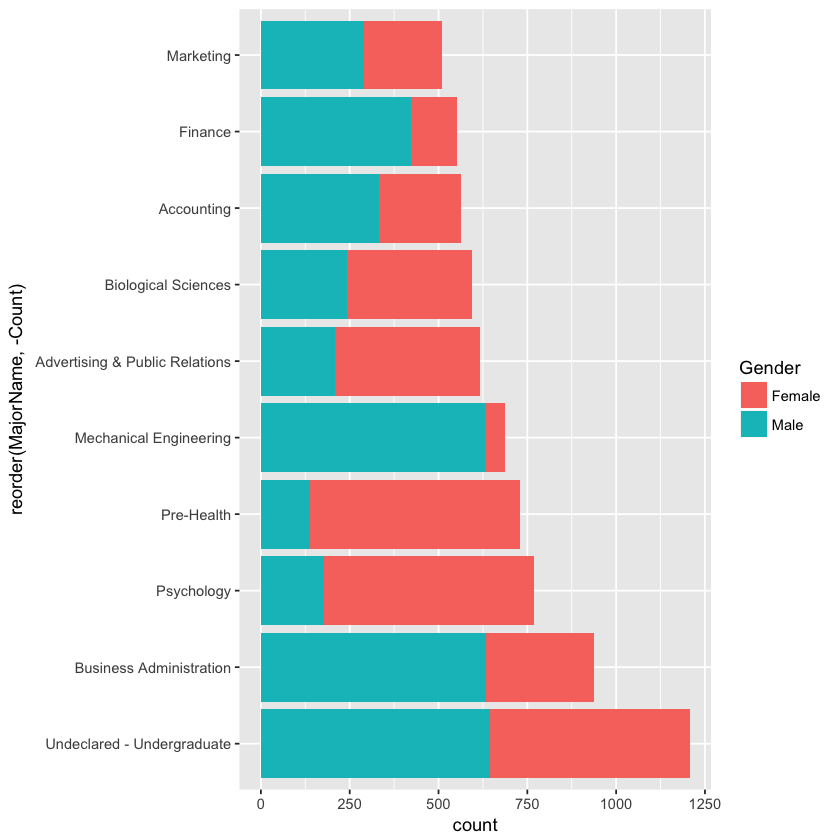

In [13]:
ggplot(largest, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip()

reorder by using command weight=count, not by percent change to see the shapes clearly. 

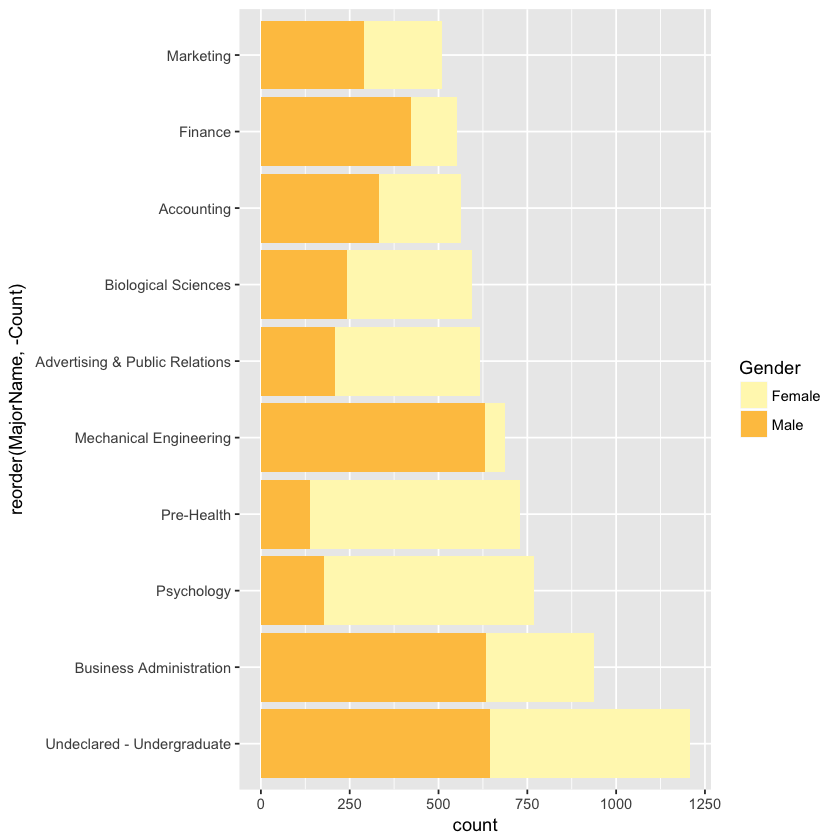

In [14]:
ggplot(largest, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip() + scale_fill_brewer(palette="YlOrBr")

this color is not efficient because
1. it is too bright, not comfortable for eyes to see
2. if we use two colors with the same one, in this case is yellow, but with different gradient (one is darker than another) it can mean that the dark one has more value than the light one. so, we want to avoid this kind of perception. 

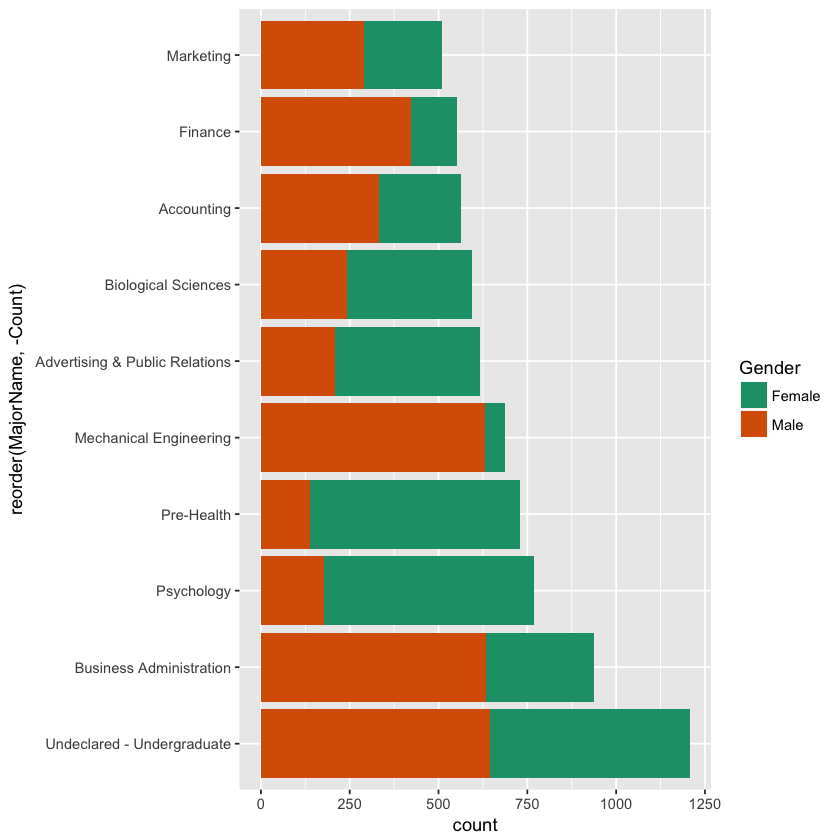

In [16]:
ggplot(largest, aes(reorder(MajorName, -Count), weight=Count, fill=Gender)) + geom_bar() + coord_flip() + scale_fill_brewer(palette="Dark2")

Effective color because:
1. there is no lighter or darker color. Both colors are dark
2. comfortable for the eyes. 